In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1.Load the data file using pandas. 

df= pd.read_csv('googleplaystore.csv')

In [3]:
df.shape

(10841, 13)

In [4]:
df.head (5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# 2.Check for null values in the data. Get the number of null values for each column.

df.isnull().sum ()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
# 3.Drop records with nulls in any of the columns.

df = df.dropna()

In [8]:
# After dropping the nulls

df.isnull().sum ()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [9]:
# Drop the rows where all elements are Outliers.

df = df[df.Size != 'Varies with device']

In [10]:
# 4.1 Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
# Extract the numeric value from the column
# multiply the value by 1,000, if size is mentioned in Mb

def MtoK(b):
    if b[len(b) -1: ] == 'M':
        return(float(b[0: len(b) -1 ])*1000)
    elif b[len(b) -1: ] == 'K' or  b[len(b) -1: ] == 'k':
        return(float(b[0: len(b) -1 ]))
    else:
        return b

In [11]:
df.Size = df.Size.apply(MtoK)

In [12]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   object 
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   object 
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   object 
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(2), object(11)
memory usage: 844.7+ KB


In [13]:
df.Size

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10833      619.0
10834     2600.0
10836    53000.0
10837     3600.0
10840    19000.0
Name: Size, Length: 7723, dtype: float64

In [14]:
df = df[df.Size != 'Varies with device']

In [15]:
df.shape

(7723, 13)

In [16]:
# 4.2 Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).
#converts to int

df ["Reviews"] = df ['Reviews'].astype ("int64")

In [17]:
df ["Reviews"].dtype

dtype('int64')

In [19]:
# 4.3 Installs field is currently stored as string and has values like 1,000,000+. 
# Treat 1,000,000+ as 1,000,000
# remove ‘+’, ‘,’ from the field, convert it to integer

df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = df['Installs'].str.replace(',','')
df["Installs"] = df["Installs"].astype(int)

C:\Users\KARTHIK CR\AppData\Local\Temp\ipykernel_8068\1270162147.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+','')


In [20]:
df.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7723, dtype: int32

In [21]:
# 4.4 Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

df['Price'] = df['Price'].str.replace('$',' ')
df["Price"] = df["Price"].astype(float)

C:\Users\KARTHIK CR\AppData\Local\Temp\ipykernel_8068\2225675908.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$',' ')


In [22]:
df ["Price"].dtype

dtype('float64')

In [23]:
df.Price

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10833    0.0
10834    0.0
10836    0.0
10837    0.0
10840    0.0
Name: Price, Length: 7723, dtype: float64

In [24]:
# 5.1 Sanity checks:
# Average rating should be between 1 and 5 as only these values are allowed on the play store.
#  Drop the rows that have a value outside this range.

df[(df.Rating <1) | (df.Rating>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [25]:
# 5.2 Reviews should not be more than installs as only those who installed can review the app. If there are any such records,
# drop them.

df.loc[df.Reviews > df.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [26]:
df.loc[df.Reviews > df.Installs].describe ()

,Rating,Reviews,Size,Installs,Price
count,6.0,6.000000,6.000000,6.000000,6.000000
mean,5.0,7.666667,15050.000000,4.666667,0.413333
std,0.0,6.947422,8219.914841,4.412105,0.659566
min,5.0,2.000000,4200.000000,1.000000,0.000000
25%,5.0,2.500000,8575.000000,1.000000,0.000000
50%,5.0,5.500000,17500.000000,3.000000,0.000000
75%,5.0,10.000000,19750.000000,8.750000,0.742500
max,5.0,20.000000,25000.000000,10.000000,1.490000


In [27]:
df[['Reviews','Installs']]

,Reviews,Installs
0,159,10000
1,967,500000
2,87510,5000000
3,215644,50000000
4,967,100000
...,...,...
10833,44,1000
10834,7,500
10836,38,5000
10837,4,100


In [28]:
# Created a column to easily identify results for the syntax

df['RAI'] = np.where((df['Reviews'] <= df['Installs']), df['Installs'], np.nan)

In [29]:
df['RAI'].shape

(7723,)

In [30]:
df['RAI'].describe()

count    7.717000e+03
mean     8.430620e+06
std      5.017636e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: RAI, dtype: float64

In [31]:
df = df.dropna()

In [32]:
df = df.drop(['RAI'], axis = 1)

In [33]:
df.shape

(7717, 13)

In [34]:
# 5.3 For free apps (type = “Free”), the price should not be >0. Drop any such rows.

df.loc[df.Price > 0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.0,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.0,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.0,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.0,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
477,Calculator,DATING,2.6,57,6200.0,1000,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10682,Fruit Ninja Classic,GAME,4.3,85468,36000.0,1000000,Paid,0.99,Everyone,Arcade,"June 8, 2018",2.4.1.485300,4.0.3 and up
10690,FO Bixby,PERSONALIZATION,5.0,5,861.0,100,Paid,0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400.0,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11000.0,10000,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up


In [35]:
# check to confirm any free app with Price > 0

df[np.logical_and(df['Type'] == 'Free', df['Price'] > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


{'whiskers': [<matplotlib.lines.Line2D at 0x1f940ec9900>,
 'caps': [<matplotlib.lines.Line2D at 0x1f940ec9e40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f940ec9660>],
 'medians': [<matplotlib.lines.Line2D at 0x1f940eca380>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f940eca620>],
 'means': []}

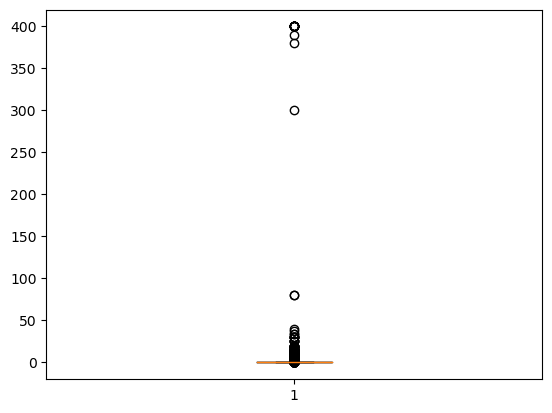

In [36]:
# Performing univariate analysis: 
# Boxplot for Price
# Are there any outliers? Think about the price of usual apps on Play Store.

plt.boxplot(df['Price'])

In [37]:
df['Price'].describe()

count    7717.000000
mean        1.128725
std        17.414784
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1f940f699c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f940f69f00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f940f69720>],
 'medians': [<matplotlib.lines.Line2D at 0x1f940f6a440>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f940f6a6e0>],
 'means': []}

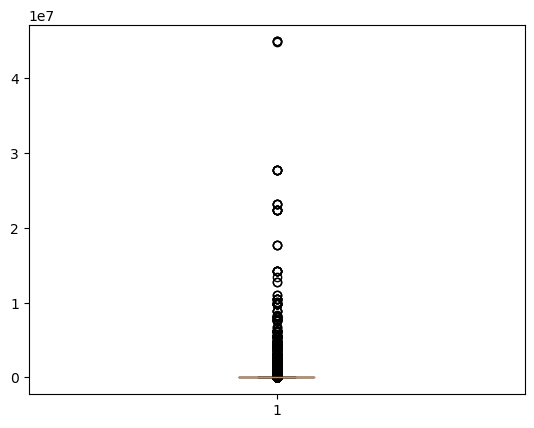

In [38]:
#Boxplot for Reviews
#Are there any apps with very high number of reviews? Do the values seem right?

plt.boxplot(df['Reviews'])

In [39]:
df['Reviews'].describe()

count    7.717000e+03
mean     2.951275e+05
std      1.864640e+06
min      1.000000e+00
25%      1.090000e+02
50%      2.351000e+03
75%      3.910900e+04
max      4.489389e+07
Name: Reviews, dtype: float64

(array([  17.,   18.,   39.,   72.,  132.,  408.,  781., 1406., 3212.,
        1632.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

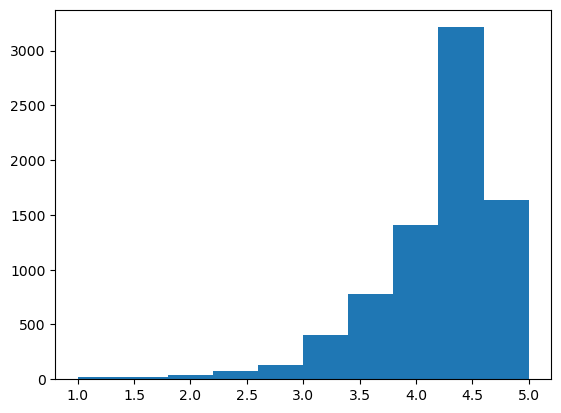

In [40]:
#Histogram for Rating
#How are the ratings distributed? Is it more toward higher ratings?

plt.hist(df['Rating'])

(array([3245., 1398.,  991.,  606.,  449.,  325.,  226.,  161.,  117.,
         199.]),
 array([8.500000e+00, 1.000765e+04, 2.000680e+04, 3.000595e+04,
        4.000510e+04, 5.000425e+04, 6.000340e+04, 7.000255e+04,
        8.000170e+04, 9.000085e+04, 1.000000e+05]),
 <BarContainer object of 10 artists>)

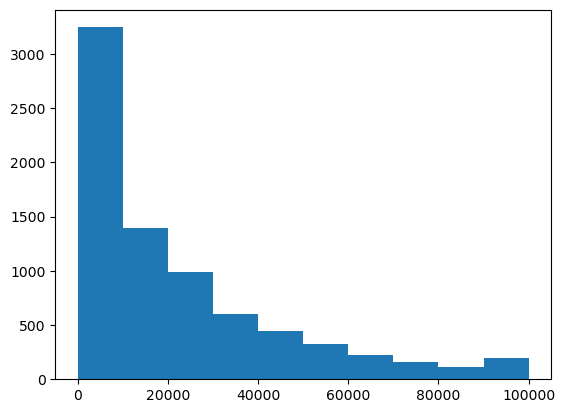

In [41]:
# Histogram for Size

plt.hist(df['Size'])

In [42]:
# 6. Outlier treatment: 
# Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application
# on the Play Store is very high and suspicious!
# Check out the records with very high price
# Is 200 indeed a high price?

# price of $200 and above for an application is expected to be very high

df[df['Price']>200].index.shape[0]

15

In [43]:
df.loc[df['Price']>200].shape[0]

15

In [44]:
# Drop these as most seem to be junk apps

df.drop(df[df['Price']>200].index, inplace= True)

In [45]:
df.shape

(7702, 13)

In [47]:
# 6.2 Reviews: Very few apps have very high number of reviews.
# These are all star apps that don’t help with the analysis and, in fact, will skew it.
# Drop records having more than 2 million reviews.

df.loc[df.Reviews > 2000000].shape[0]

219

In [48]:
#Dropping the Star apps as these will skew the analysis

df.drop(df[df['Reviews']>2000000].index, inplace= True)

In [49]:
#checking the shape after dropping

df.shape

(7483, 13)

In [53]:
# 6.3 Installs:  There seems to be some outliers in this field too.
# Apps having very high number of installs should be dropped from the analysis.
# Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

df.quantile([0.1,0.25,0.5,0.7,0.9,0.95,0.99], axis=0)

C:\Users\KARTHIK CR\AppData\Local\Temp\ipykernel_8068\4249809040.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile([0.1,0.25,0.5,0.7,0.9,0.95,0.99], axis=0)


,Rating,Reviews,Size,Installs,Price
0.10,3.5,13.00,2500.0,1000.0,0.00
0.25,4.0,99.00,5100.0,10000.0,0.00
0.50,4.3,2026.00,14000.0,100000.0,0.00
0.70,4.5,20295.60,26000.0,1000000.0,0.00
0.90,4.7,180385.40,56000.0,10000000.0,0.00
0.95,4.8,407660.30,72900.0,10000000.0,1.99
0.99,5.0,1242884.16,96000.0,50000000.0,8.99


In [54]:
# #dropping the value more than the cutoff(threshold -95th percentile)

df.drop(df[df['Installs']>10000000].index, inplace= True)

In [55]:
df.shape

(7307, 13)

form the plot below, rating does not increase with price


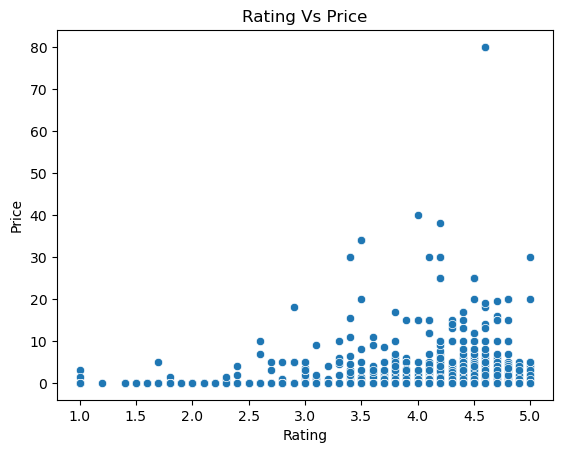

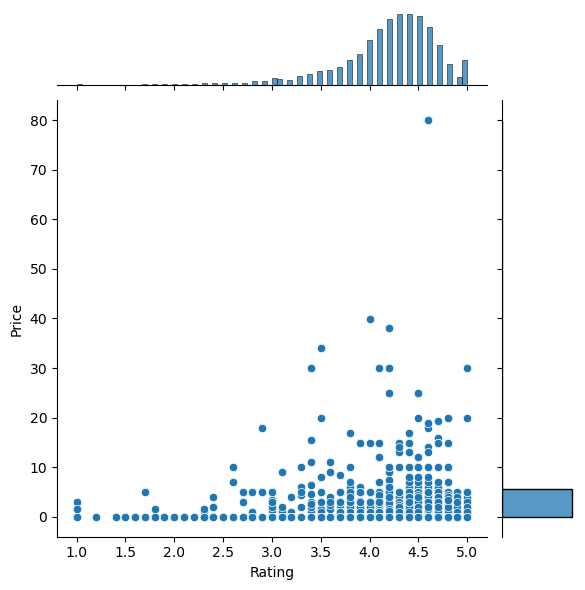

In [59]:
# 7. Bivariate analysis: 
# 7.1 Make scatter plot/joinplot for Rating vs. Price
# What pattern do you observe? Does rating increase with price?

sns.scatterplot(x = 'Rating', y = 'Price',data=df)
plt.title('Rating Vs Price')

sns.jointplot(x= 'Rating',y= 'Price',data= df)

print('form the plot below, rating does not increase with price')

from the plot, lighter apps have less ratings than the heavier apps and are likely to be rated lower


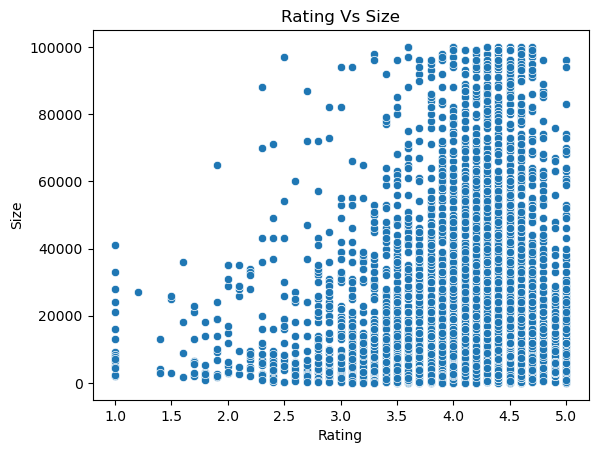

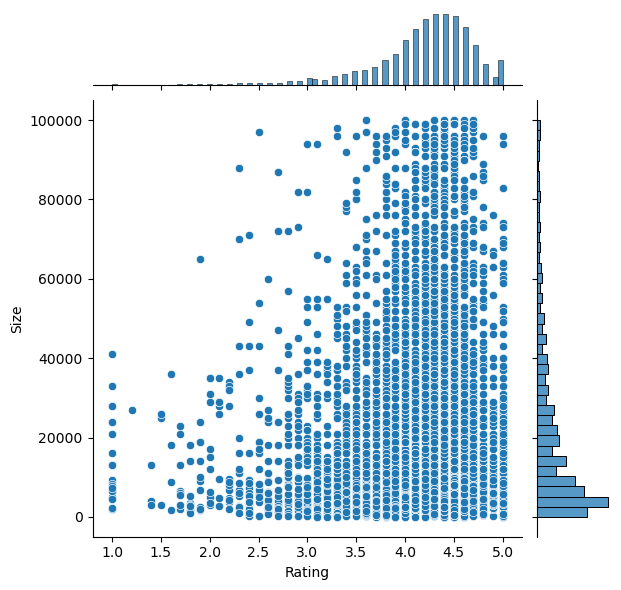

In [60]:
# 7.2 Make scatter plot/joinplot for Rating vs. Size
# Are heavier apps rated better?

sns.scatterplot(x= 'Rating',y= 'Size', data= df)
plt.title('Rating Vs Size')

sns.jointplot(x= 'Rating', y= 'Size', data= df)

print('from the plot, lighter apps have less ratings than the heavier apps and are likely to be rated lower')

from the plot, apps with the most reviews are rated highly


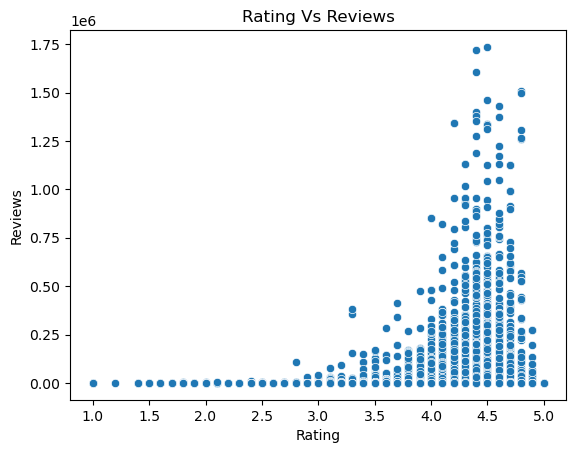

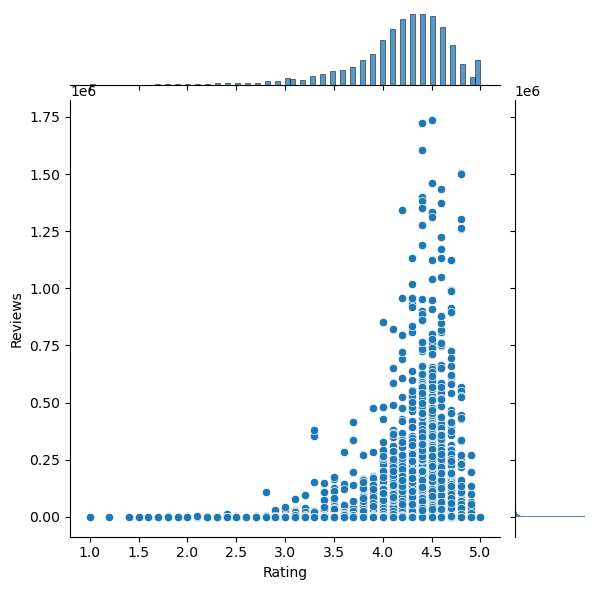

In [61]:
# 7.3 Make scatter plot/joinplot for Rating vs. Reviews
# Does more review mean a better rating always?

sns.scatterplot(x= 'Rating',y= 'Reviews', data= df)
plt.title('Rating Vs Reviews')

sns.jointplot(x= 'Rating', y= 'Reviews', data= df)

print('from the plot, apps with the most reviews are rated highly')

Apps for Teens  Content Rating are generally rated higher than others, while the apps for Everyone show a large variance in rating


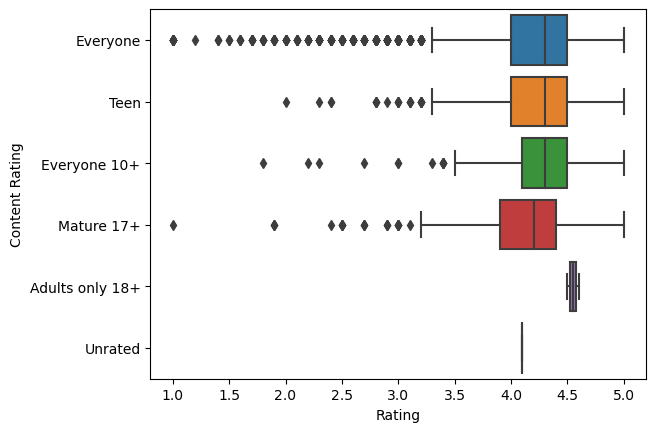

In [66]:
# 7.4 Make boxplot for Rating vs. Content Rating
# Is there any difference in the ratings? Are some types liked better?

sns.boxplot(x= 'Rating', y= 'Content Rating', data = df)
print('Apps for Teens  Content Rating are generally rated higher than others, while the apps for Everyone show a large variance in rating')

Apps for parenting and events show the highest ratings


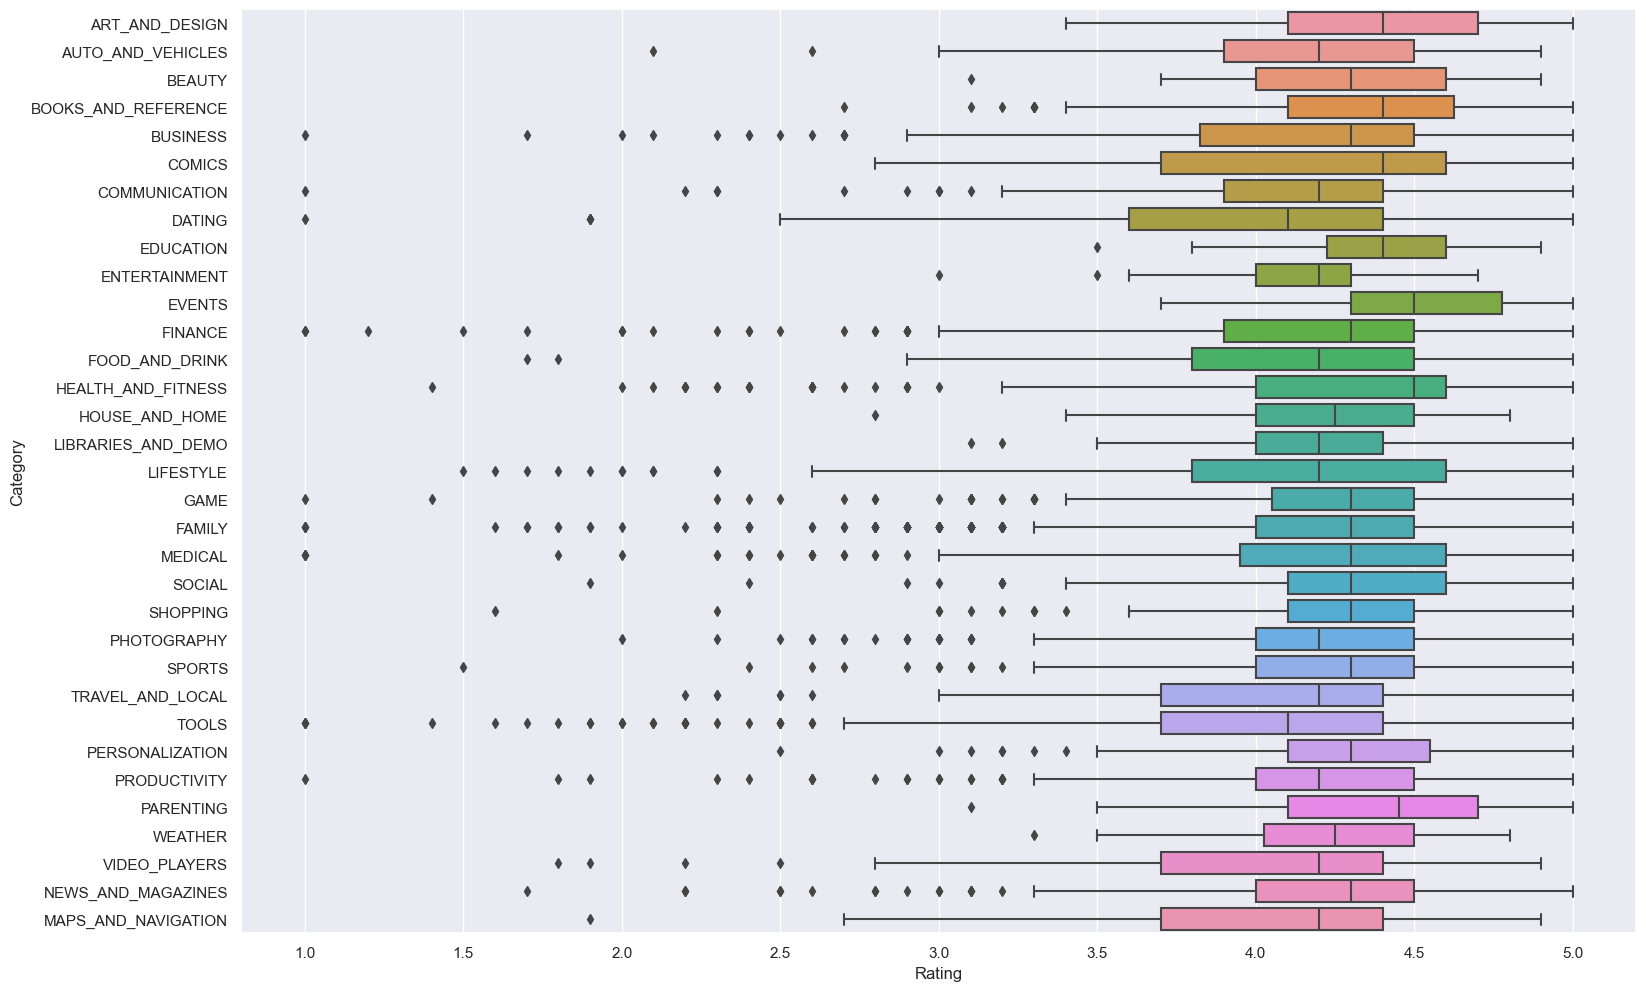

In [70]:
# 7.5 Make boxplot for Ratings vs. Category
# Which genre has the best ratings?

sns.set(rc={'figure.figsize':(18,12)})
sns.boxplot(x= 'Rating', y = 'Category', data= df)
print('Apps for parenting and events show the highest ratings')

In [71]:
# 8. Data preprocessing
# For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

inp1= df.copy()

In [72]:
# 8.1  Reviews and Install have some values that are still relatively very high. 
# Before building a linear regression model, you need to reduce the skew. 
# Apply log transformation (np.log1p) to Reviews and Installs.


inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1['Installs'] = np.log1p(inp1['Installs'])
inp1['Size'] = np.log1p(inp1['Size'])

In [74]:
# 8.2 Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.


inp1.drop(columns = ['App', 'Last Updated', 'Current Ver', 'Android Ver'], axis = 1, inplace = True)

In [75]:
inp1.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

In [76]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,9.852247,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,9.546884,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,9.071193,15.424949,Free,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.875232,7.937732,11.512935,Free,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.123964,8.630700,10.819798,Free,0.0,Everyone,Art & Design


In [77]:
inp1.shape

(7307, 9)

In [78]:
# 8.3 Get dummy columns for Category, Genres, and Content Rating. 
#This needs to be done as the models do not understand categorical data, and all data should be numeric. 
#Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

categorical_cols = ['Category', 'Genres', 'Content Rating', 'Type']

inp2 = pd.get_dummies(inp1, columns=categorical_cols, drop_first=True)

In [79]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Type_Paid
0,4.1,5.075174,9.852247,9.210440,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3.9,6.875232,9.546884,13.122365,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,4.7,11.379520,9.071193,15.424949,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4.3,6.875232,7.937732,11.512935,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,4.4,5.123964,8.630700,10.819798,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [81]:
# 9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(inp2, train_size = 0.7, random_state = 32)

In [82]:
df_train.shape, df_test.shape

((5114, 154), (2193, 154))

In [83]:
# 10. Separate the dataframes into X_train, y_train, X_test, and y_test.

y_train = df_train.Rating
X_train = df_train.drop(['Rating'], axis=1)

y_test = df_test.Rating
X_test = df_test.drop(['Rating'], axis=1)

In [85]:
# 11 . Model building
# 11.1 Use linear regression as the technique

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [86]:
# 11.2 Report the R2 on the train set

from sklearn.metrics import r2_score
y_train_pred= lr.predict(X_train)
r2_score(y_train, y_train_pred)

0.15559171269437966

In [87]:
# 12. Make predictions on test set and report R2.

y_test_pred= lr.predict(X_test)
r2_score(y_test, y_test_pred)

0.12995093196719698